<span style="color:Red; font-size=60px">
now i have to make a binary classifier with a input of 1 channel and 250 instances
</span>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import datetime
import scipy.fftpack

#! defining the basic structure of the model
#* this will take a input of 250 sample 
class eegmodel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = keras.layers.Dense(125, activation=tf.nn.relu)
        self.dense2 = keras.layers.Dense(100, activation=tf.nn.relu)
        self.dense3 = keras.layers.Dense(80, activation=tf.nn.relu)
        self.dense4 = keras.layers.Dense(50, activation=tf.nn.relu)
        self.dense5 = keras.layers.Dense(25, activation=tf.nn.relu)
        self.dense6 = keras.layers.Dense(10, activation=tf.nn.relu)
        self.dense7 = keras.layers.Dense(6, activation=tf.nn.relu)
        self.dense8 = keras.layers.Dense(4, activation=tf.nn.relu)
        self.out = keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dense5(x)
        x = self.dense6(x)
        x = self.dense7(x)
        x = self.dense8(x)
        return self.out(x)



# this is for handstart only

In [2]:
import pandas as pd
import numpy as np

In [3]:
dftraintotal = pd.read_csv("./data/subj1_series1_data.csv")

In [4]:
dftraintotal

,id,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,subj1_series1_0,-31,363,211,121,211,15,717,279,35,...,536,348,383,105,607,289,459,173,120,704
1,subj1_series1_1,-29,342,216,123,222,200,595,329,43,...,529,327,369,78,613,248,409,141,83,737
2,subj1_series1_2,-172,278,105,93,222,511,471,280,12,...,511,319,355,66,606,320,440,141,62,677
3,subj1_series1_3,-272,263,-52,99,208,511,428,261,27,...,521,336,356,71,568,339,437,139,58,592
4,subj1_series1_4,-265,213,-67,99,155,380,476,353,32,...,550,324,346,76,547,343,446,171,67,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,subj1_series1_119491,478,520,377,172,141,118,-123,626,70,...,383,85,-1,444,337,-255,160,-121,-285,-178
119492,subj1_series1_119492,439,450,298,185,128,502,-331,593,30,...,334,61,-8,427,322,-310,107,-152,-295,-178
119493,subj1_series1_119493,363,370,278,239,124,768,-410,527,16,...,303,53,-24,438,368,-134,187,-99,-269,-121
119494,subj1_series1_119494,281,298,318,257,130,736,-556,542,29,...,341,50,-25,444,348,-135,181,-122,-290,-77


### first we have to do it by one channel only then i have to 
### do it for all channels and then the selected channels

In [5]:
from tqdm import tqdm

In [6]:
y = np.array(dftraintotal["Fp1"])
y

array([ -31,  -29, -172, ...,  363,  281,  242])

In [7]:
dflabeltotal = pd.read_csv("./data/subj1_series1_events.csv")
dflabeltotal

,id,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,subj1_series1_0,0,0,0,0,0,0
1,subj1_series1_1,0,0,0,0,0,0
2,subj1_series1_2,0,0,0,0,0,0
3,subj1_series1_3,0,0,0,0,0,0
4,subj1_series1_4,0,0,0,0,0,0
...,...,...,...,...,...,...,...
119491,subj1_series1_119491,0,0,0,0,0,0
119492,subj1_series1_119492,0,0,0,0,0,0
119493,subj1_series1_119493,0,0,0,0,0,0
119494,subj1_series1_119494,0,0,0,0,0,0


In [8]:
ylabel = np.array(dflabeltotal["HandStart"])

In [9]:

num_train_data = 100000
num_test_data = 19496
numinput = 250
num_train_batch = 0

In [29]:
# # def datamaker(num_train_data, num_test_data, numinput, num_train_batch, train_data, train_labels, y, ylabel):
# for k in tqdm(range(num_train_data-numinput-1)):
#     train_data = np.concatenate((train_data,y[k:k+numinput]));
#     num_train_batch = num_train_batch + 1  

# train_data = np.reshape(train_data, (num_train_batch,numinput))



In [10]:
train_data = y[:num_train_data]

In [11]:
train_data.shape

(100000,)

In [12]:
119246-99749

19497

In [13]:
train_labels = ylabel[0:num_train_data]

In [14]:
train_labels.shape

(100000,)

In [15]:
ylabel.shape

(119496,)

In [ ]:
dftrain = pd.read_csv('./data/new/newtrainsubj1_series1_data.csv')
dftrainlabel = pd.read_csv('./data/new/newtrainsubj1_series1_labels.csv')

In [ ]:
train_data = np.array(dftrain)
train_labels = np.array(dftrainlabel)

In [35]:
dftrain = pd.read_csv('./data/new/newtrainsubj1_series1_data.csv')
# dftrainlabel = pd.read_csv('./data/new/newtrainsubj1_series1_labels.csv')

In [4]:
dftrain

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,0,-6.710738,-6.704289,-7.165431,-7.487907,-7.465334,-7.429861,-7.113834,-6.684940,-6.472106,...,-6.085134,-5.843276,-5.759432,-5.956143,-6.072235,-6.262496,-6.268946,-6.091583,-6.056111,-5.962593
1,1,-6.704289,-7.165431,-7.487907,-7.465334,-7.429861,-7.113834,-6.684940,-6.472106,-6.291519,...,-5.843276,-5.759432,-5.956143,-6.072235,-6.262496,-6.268946,-6.091583,-6.056111,-5.962593,-6.020639
2,2,-7.165431,-7.487907,-7.465334,-7.429861,-7.113834,-6.684940,-6.472106,-6.291519,-6.323767,...,-5.759432,-5.956143,-6.072235,-6.262496,-6.268946,-6.091583,-6.056111,-5.962593,-6.020639,-6.091583
3,3,-7.487907,-7.465334,-7.429861,-7.113834,-6.684940,-6.472106,-6.291519,-6.323767,-6.275395,...,-5.956143,-6.072235,-6.262496,-6.268946,-6.091583,-6.056111,-5.962593,-6.020639,-6.091583,-6.204450
4,4,-7.465334,-7.429861,-7.113834,-6.684940,-6.472106,-6.291519,-6.323767,-6.275395,-6.365688,...,-6.072235,-6.262496,-6.268946,-6.091583,-6.056111,-5.962593,-6.020639,-6.091583,-6.204450,-6.223799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99744,99744,-6.455982,-6.597872,-6.830055,-6.901000,-6.752660,-6.520477,-6.443083,-6.468881,-6.507578,...,-5.801354,-5.952918,-5.901322,-5.978717,-6.233473,-6.165753,-6.052886,-6.123831,-6.256046,-6.385037
99745,99745,-6.597872,-6.830055,-6.901000,-6.752660,-6.520477,-6.443083,-6.468881,-6.507578,-6.617220,...,-5.952918,-5.901322,-5.978717,-6.233473,-6.165753,-6.052886,-6.123831,-6.256046,-6.385037,-6.572074
99746,99746,-6.830055,-6.901000,-6.752660,-6.520477,-6.443083,-6.468881,-6.507578,-6.617220,-6.597872,...,-5.901322,-5.978717,-6.233473,-6.165753,-6.052886,-6.123831,-6.256046,-6.385037,-6.572074,-6.433409
99747,99747,-6.901000,-6.752660,-6.520477,-6.443083,-6.468881,-6.507578,-6.617220,-6.597872,-6.285069,...,-5.978717,-6.233473,-6.165753,-6.052886,-6.123831,-6.256046,-6.385037,-6.572074,-6.433409,-6.139955


In [38]:
# dftrainlabel = pd.DataFrame(train_labels)
# # dftrain.drop(['Unnamed: 0'], axis=1, inplace=True)
# # dftrainlabel.drop(['Unnamed: 0'], axis=1, inplace=True)
# dftrainlabel.to_csv('./data/new/newtrainsubj1_series1_labels.csv', index=False)
# dftrain.to_csv('./data/new/newtrainsubj1_series1_data.csv', index=False)

In [16]:
model = eegmodel()
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae']) 
model.build(input_shape=(None, 250))

In [19]:
train_data.shape[0]/250

400.0

In [21]:
y

array([ -31,  -29, -172, ...,  363,  281,  242])

In [37]:
train_data = train_data.reshape(400, 250)

In [38]:
train_data.shape

(400, 250)

In [23]:
train_labels = train_labels.reshape(400, 250)
finallabel = []
for i in range(train_labels.shape[0]):
    finallabel.append(max(train_labels[i]))

In [39]:
train_labels = finallabel
train_labels = np.array(train_labels)
train_labels = train_labels.reshape(400, 1)
train_labels.shape

(400, 1)

Epoch 1/10


2023-03-17 16:44:29.571369: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 - 2s - loss: 28.5451 - mae: 2.6116 - val_loss: 1.3284 - val_mae: 0.8140 - 2s/epoch - 162ms/step
Epoch 2/10
10/10 - 0s - loss: 1.1411 - mae: 0.7870 - val_loss: 0.9300 - val_mae: 0.7303 - 49ms/epoch - 5ms/step
Epoch 3/10
10/10 - 0s - loss: 0.9729 - mae: 0.7538 - val_loss: 0.8950 - val_mae: 0.7390 - 46ms/epoch - 5ms/step
Epoch 4/10
10/10 - 0s - loss: 0.8373 - mae: 0.6665 - val_loss: 0.7664 - val_mae: 0.6825 - 47ms/epoch - 5ms/step
Epoch 5/10
10/10 - 0s - loss: 1.1332 - mae: 0.7952 - val_loss: 0.6667 - val_mae: 0.6272 - 48ms/epoch - 5ms/step
Epoch 6/10
10/10 - 0s - loss: 0.6719 - mae: 0.6232 - val_loss: 0.3948 - val_mae: 0.4768 - 45ms/epoch - 4ms/step
Epoch 7/10
10/10 - 0s - loss: 0.7598 - mae: 0.4869 - val_loss: 3.0772 - val_mae: 0.9363 - 46ms/epoch - 5ms/step
Epoch 8/10
10/10 - 0s - loss: 0.3243 - mae: 0.3650 - val_loss: 0.6166 - val_mae: 0.5147 - 49ms/epoch - 5ms/step
Epoch 9/10
10/10 - 0s - loss: 0.2199 - mae: 0.2974 - val_loss: 0.5005 - val_mae: 0.4682 - 48ms/epoch - 5ms/step
Ep

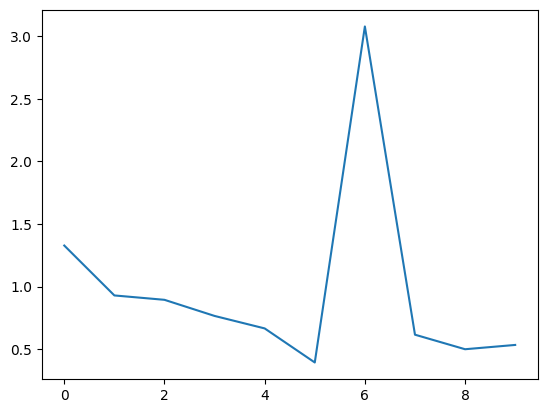

In [40]:
EPOCHS = 10
strt_time = datetime.datetime.now()
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                  validation_split=0.2, verbose=2,
                  callbacks=[])
curr_time = datetime.datetime.now()
timedelta = curr_time - strt_time
dnn_train_time = timedelta.total_seconds()
print("DNN training done. Time elapsed: ", timedelta.total_seconds(), "s")
plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
plt.show()

In [ ]:
# num_test_batch = 0
# strt_idx = num_train_batch
# test_data=[]
# for k in tqdm(range(strt_idx, strt_idx+num_test_data-numinput-1)):
#   test_data = np.concatenate((test_data,y[k:k+numinput]));
#   num_test_batch = num_test_batch + 1  
# test_data = np.reshape(test_data, (num_test_batch, numinput))


In [53]:
test_data = y[num_train_data:-246]
test_labels = ylabel[num_train_data:-246]

In [55]:
test_data = test_data.reshape(int(test_data.shape[0]/250), 250)
test_data.shape

(77, 250)

In [58]:
test_labels= ylabel[num_train_data:-246]

In [60]:
test_labels = test_labels.reshape(77, 250)

In [61]:
test_labels.shape

(77, 250)

In [62]:
test_labels = test_labels.reshape(77, 250)
finallabel = []
for i in range(test_labels.shape[0]):
    finallabel.append(max(test_labels[i]))

In [63]:
test_labels = finallabel
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(77, 1)
test_labels.shape

(77, 1)

In [44]:

dft = pd.DataFrame(test_data)
dft.to_csv('test_data.csv', index=False) 
dft = pd.DataFrame(test_labels)
dft.to_csv('test_labels.csv', index=False)

In [9]:
test_data = pd.read_csv('test_data.csv')

In [65]:
dnn_predictions = model.predict(test_data)
# keras_dnn_err = test_labels - dnn_predictions
# plt.plot(dnn_predictions[0:100])
# plt.plot(test_labels[0:100],'r')
# plt.show()
# dnn_predictions.max()

3/3 [==============================] - 0s 3ms/step


In [66]:
dnn_predictions

array([[-0.0443135 ],
       [-0.05399727],
       [-0.04140594],
       [-0.03201761],
       [-0.10978156],
       [ 0.62797064],
       [-0.1571263 ],
       [-0.06329773],
       [-0.09092434],
       [-0.0391513 ],
       [-0.03784695],
       [-0.02560533],
       [-0.04141625],
       [ 0.90974754],
       [-0.02131157],
       [-0.01206553],
       [ 0.02664978],
       [ 0.05589435],
       [-0.05314032],
       [-0.0436772 ],
       [-0.11673357],
       [ 0.02200584],
       [ 0.00251403],
       [-0.06124856],
       [ 0.00251403],
       [-0.11536945],
       [-0.0521253 ],
       [-0.25209644],
       [-0.21598934],
       [-0.00589697],
       [ 0.8753057 ],
       [ 0.7480055 ],
       [-0.07282817],
       [ 0.00251403],
       [-0.02845492],
       [ 0.34688455],
       [-0.09711729],
       [-0.05042119],
       [-0.0202639 ],
       [-0.06970041],
       [-0.03081663],
       [-0.06988687],
       [-0.07942631],
       [-0.10111162],
       [-0.9962605 ],
       [-0

In [67]:
pred = []
for it in dnn_predictions:
    if it > 0.5:
        it = 1
        pred.append(1)
    else:
        it = 0
        pred.append(0)

In [69]:
pred = np.array(pred)
pred.shape

(77,)

In [72]:
for i in range(len(pred)):
    if pred[i] == 1:
        print(i)

5
13
30
31
56
57
69


In [74]:
for i in range(len(pred)):
    if test_labels[i] == 1:
        print(i)

11
23
24
37
49
50
64
65
